#1. 규제(Regularization)
>학습 데이터에 대한 과적합을 방지하기 위한 penalty 부여
* L1 : 절대값 가중치 합에 규제 강도를 곱한다. Lasso 회귀 알고리즘을 사용한다.
* L2 : 각 가중치 제곱의 합에 규제 강도를 곱한다. Ridge 회귀 알고리즘을 사용한다. 규제강도가 클 수록 규제를 중요하게 처리함.

> L2 규제가 L1 규제에 비해 더 안정적이라 일반적으로는 L2 규제가 더 많이 사용된다

#2. Ridge
> L2 정규화 계수를 적용한 것으로 선형회귀에 가중치들의 제곱합에 대한 최소화를 추가한 알고리즘이다.

##2.1 데이터 읽기(Quiz)

> 2.2코드가 정상적으로 동작할 수 있도록 boston 데이터를 로드하시오

##2.2 교차검증

> 기존의 선형회귀보다 약간의 성능향상을 보여주고 있다.

##2.3 최적의 파라미터 찾기

> Ridge 알고리즘에서는 alpha값이 커지면 커질 수록 성능이 향상되는 것을 볼 수 있다.

> 회귀 계수는 다음과 같은 성질을 갖는다.
- 양수 : 값이 커질수록 결과도 커진다.
- 음수 : 값이 커질수록 결과는 작아진다.

> 위의 차트를 다음과 같이 해석할 수 있다.
- RM(방 수)이 크면 클 수록 집값은 비싸진다.
- CHAS(찰스강 뷰)이면 집값이 비싸진다.
- NOX(일산화탄소 농도)가 낮으면 낮을 수록 집값이 비싸진다.
- DIS(5개 주요 고용센터까지의 가중 거리)가 짧을수록 집값이 비싸진다.

> 여기서 NOX는 Alpha값을 증가 시켜 중요도에서 배제하게 되었다. 즉 집값에는 큰 영향이 없다고 해석할 수 있다.

#8. 라쏘 회귀
> 선형 회귀에 L1 정규화 계수를 적용한 것으로 가중치의 절대값의 합을 최소화하는 계수를 추가한 알고리즘이다. 덜 중요한 feature를 0으로 수렴하게 만들어 성능을 향상킨다.

> 실행 결과 0.07일 경우 가장 좋은 평균 RMSE를 갖게 된다.

> 각 alpha에 따라 0으로 나타나는 feature들이 있으며 이렇게 feature를 제거함으로써 과정합을 방지할 수 있다.

#9. 엘라스틱 넷
> Elastic Net 회귀모형은 가중치의 절대값의 합(L1)과 제곱합(L2)을 동시에 제약 조건으로 가지는 모형으로 l1_ratio 옵션을 이용하여 L1의 비율을 지정할 수 있다.

> 실행 결과 0.5일 경우 가장 좋은 성능을 보여주고 있다.

> Lasso 와 비교하여 상대적으로 feature가 0이 되는 값이 적다.

#10. 선형 회귀 모델을 위한 데이터 변환

> 선형 회귀 모델은 정규분포 형태를 가질 경우 가장 좋은 성능을 얻게 된다. 하지만 간혹 특정 값의 분포로 치우치는 왜곡된 형태의 분포도를 갖게 되는 경우가 발생하여 모델의 성능을 저하하게 된다. 이러한 문제를 해결하기 위해 스케일링 / 정규화 작업을 진행하게 된다.

> 이번 챕터에서는 이러한 데이터의 변환에 대해 알아보자.

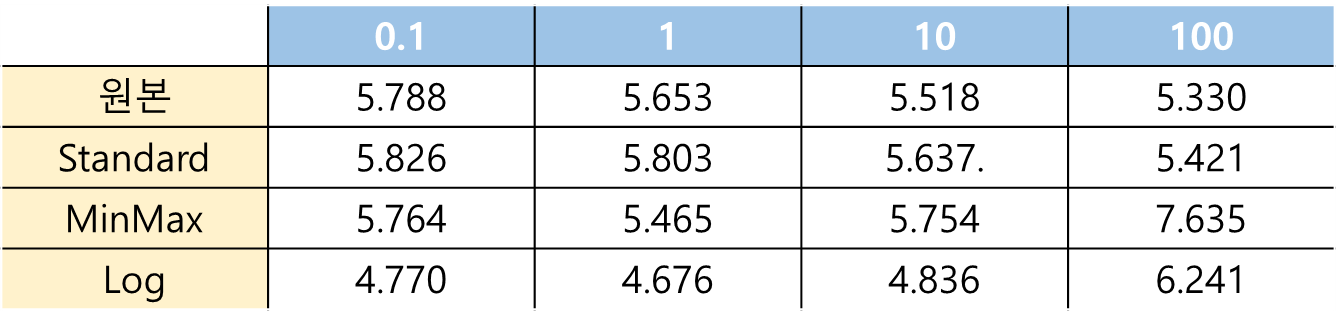

> 위의 실행 결과 log를 사용할 경우 대부분 성능이 좋게 나타났다. 이는 log의 성질이 정규 분포의 성질을 갖고 있기 때문이다 따라서 왜곡된 형태의 분포도일 경우 Log를 적용하면 모델의 성능을 향상시킬수 있다.